### Averaging models method from my other notebooks: XGB+LGBM+LSTM provide best score. 
#### Here, I will try to find differences between LSTM, XGB, LGBM and averaging models.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2022/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2022/test.csv')
sub = pd.read_csv('../input/tabular-playground-series-jan-2022/sample_submission.csv')

lgbm = pd.read_csv('../input/tps-jan2022-lgbm-optuna/submission.csv')
xgbm = pd.read_csv('../input/tps-jan2022-xgb-optuna/submission.csv')
lstm = pd.read_csv('../input/tps-jan-2022-lstm/submission.csv')

avg1 = pd.read_csv('../input/tps-jan2022-blending/submission-avg-10.csv')
avg2 = pd.read_csv('../input/k/vladlee/tps-jan2022-tuning/submission-avg-10-rnd1.csv')
avg3 = pd.read_csv('../input/k/vladlee/tps-jan2022-tuning/submission-avg-10_rnd0.csv')

In [3]:
def process_dates(df):
    df.date = pd.to_datetime(df.date)
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['week'] = df.date.dt.week
    df['weekday'] = df.date.dt.weekday
    df['dayofweek'] = df.date.dt.dayofweek
    df['dayofyear'] = df.date.dt.dayofyear
    df['day'] = df.date.dt.day
    return df

train = process_dates(train)
test = process_dates(test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [4]:
avg_num_sold = np.mean([lstm.num_sold, lgbm.num_sold, xgbm.num_sold, avg1.num_sold, avg2.num_sold, avg3.num_sold], axis=0)
test['num_sold'] = avg_num_sold
test['num_sold_lstm'] = lstm.num_sold
test['num_sold_lgbm'] = lgbm.num_sold
test['num_sold_xgbm'] = xgbm.num_sold
test['num_sold_avg1'] = avg1.num_sold
test['num_sold_avg2'] = avg2.num_sold
test['num_sold_avg3'] = avg3.num_sold

In [5]:
## this sub has 4.74 score

sub.num_sold = test.num_sold.astype(int)
sub.to_csv('submission.csv', index=False, float_format='%.6f')
sub.head(20)

,row_id,num_sold
0,26298,388
1,26299,594
2,26300,159
3,26301,673
4,26302,1026
5,26303,310
6,26304,583
7,26305,900
8,26306,270
9,26307,1005


### Display value count avg vs train by product

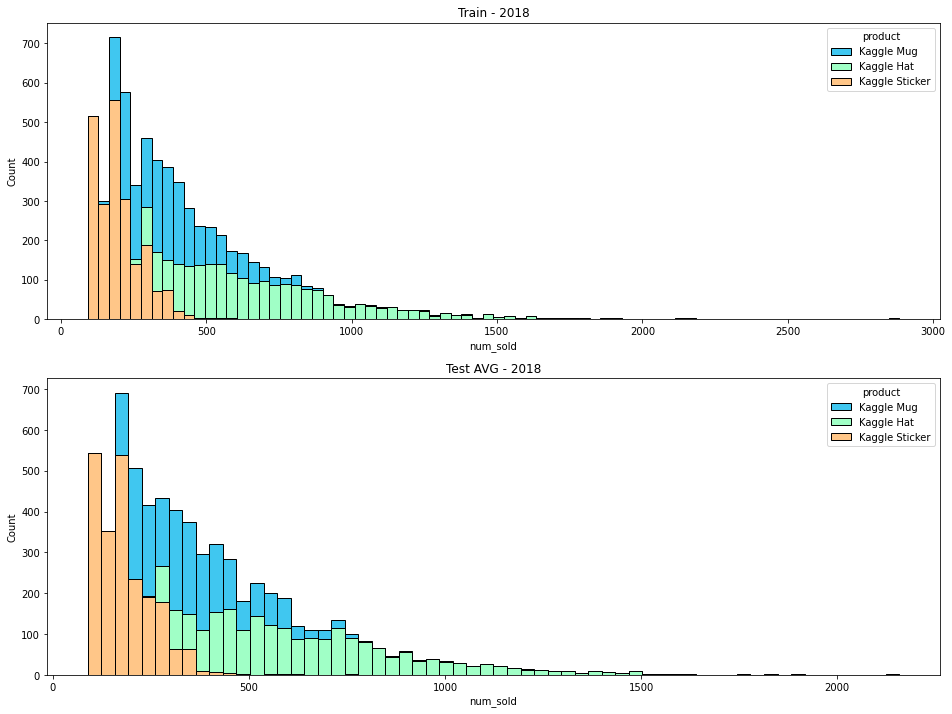

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

g1 = sns.histplot(x="num_sold", palette="rainbow", hue='product',  multiple="stack", data=train[train.date.dt.year==2018], ax=ax1)
g1.set_title("Train - 2018")

g2 = sns.histplot(x="num_sold", palette="rainbow", hue='product',  multiple="stack", data=test[test.date.dt.year==2019], ax=ax2)
g2.set_title("Test AVG - 2018")

plt.show()

### Display avg vs model by country

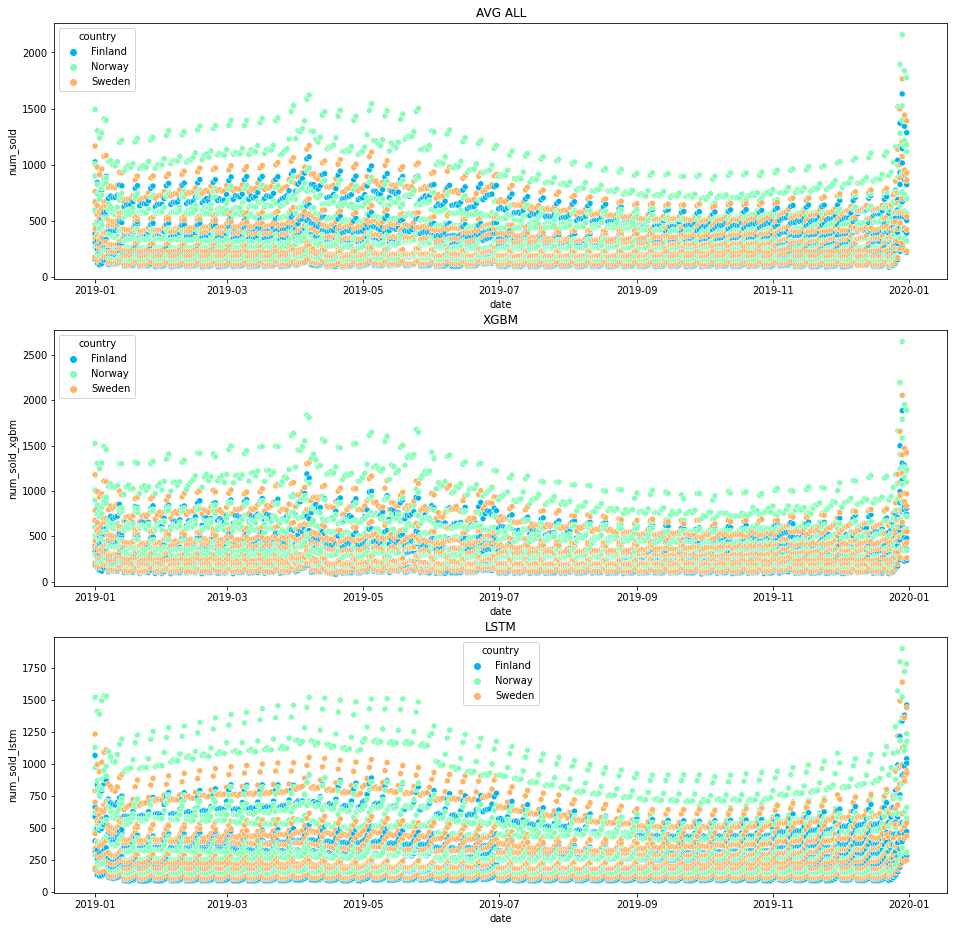

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))

g1 = sns.scatterplot(x="date", y="num_sold", palette="rainbow", hue='country', data=test[test.date.dt.year==2019], ax=ax1)
g1.set_title("AVG ALL")

g2 = sns.scatterplot(x="date", y="num_sold_xgbm", palette="rainbow", hue='country', data=test[test.date.dt.year==2019], ax=ax2)
g2.set_title("XGBM")

g3 = sns.scatterplot(x="date", y="num_sold_lstm", palette="rainbow", hue='country', data=test[test.date.dt.year==2019], ax=ax3)
g3.set_title("LSTM")

plt.show()

### Display avg diff (error) by model

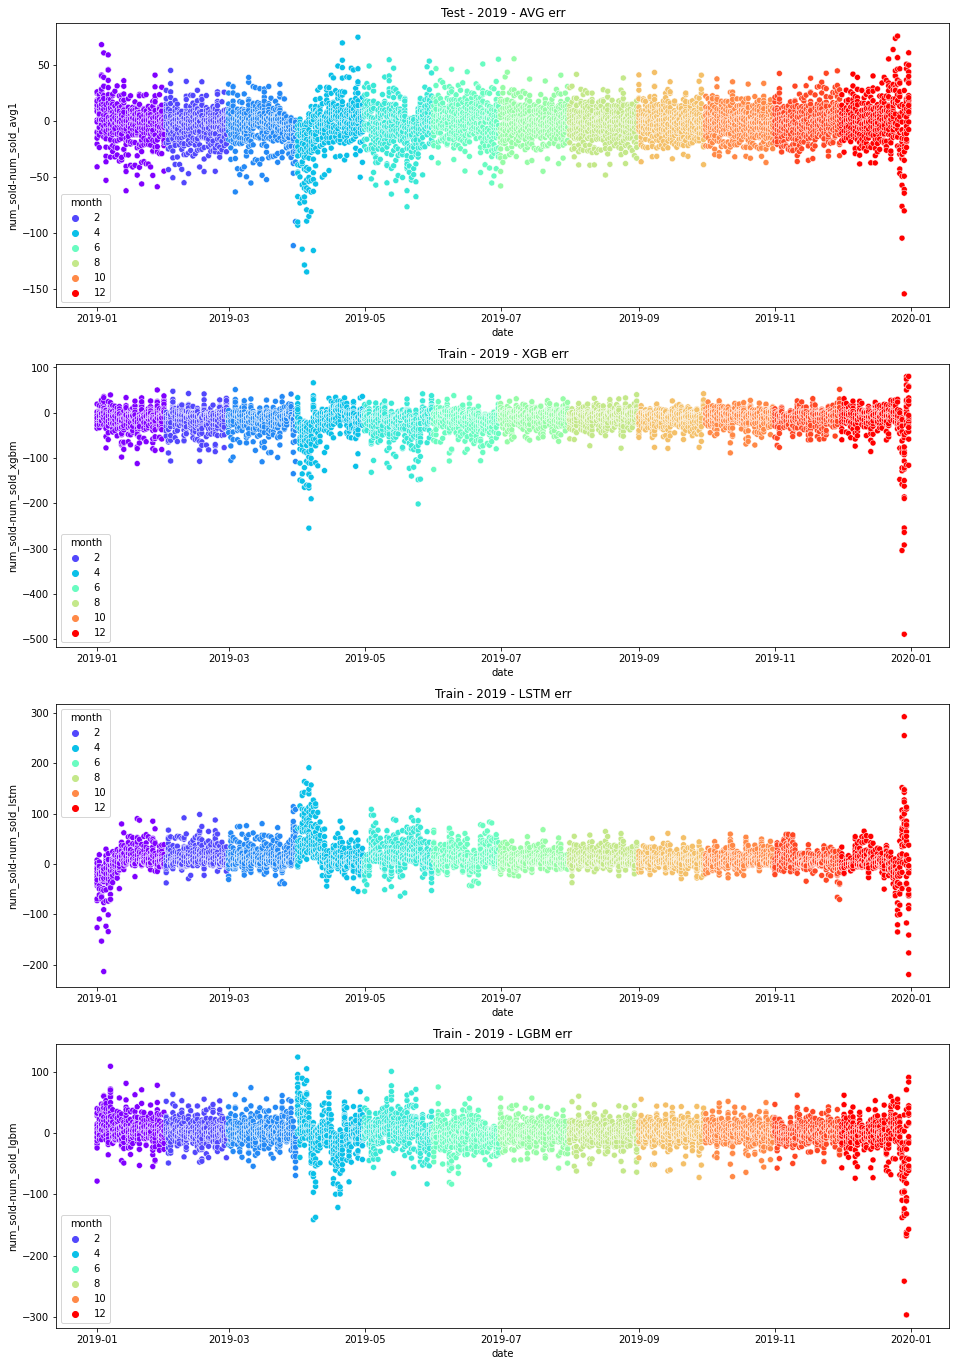

In [8]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 24))

test['num_sold-num_sold_avg1'] = test.num_sold - test.num_sold_avg1
test['num_sold-num_sold_xgbm'] = test.num_sold - test.num_sold_xgbm
test['num_sold-num_sold_lstm'] = test.num_sold - test.num_sold_lstm
test['num_sold-num_sold_lgbm'] = test.num_sold - test.num_sold_lgbm

g1 = sns.scatterplot(x="date", y="num_sold-num_sold_avg1", palette="rainbow", hue='month', data=test, ax=ax1)
g1.set_title("Test - 2019 - AVG err")

g2 = sns.scatterplot(x="date", y="num_sold-num_sold_xgbm", palette="rainbow", hue='month', data=test, ax=ax2)
g2.set_title("Train - 2019 - XGB err")

g3 = sns.scatterplot(x="date", y="num_sold-num_sold_lstm", palette="rainbow", hue='month', data=test, ax=ax3)
g3.set_title("Train - 2019 - LSTM err")

g4 = sns.scatterplot(x="date", y="num_sold-num_sold_lgbm", palette="rainbow", hue='month', data=test, ax=ax4)
g4.set_title("Train - 2019 - LGBM err")

plt.show()

### Display avg diff (error) vs model by product

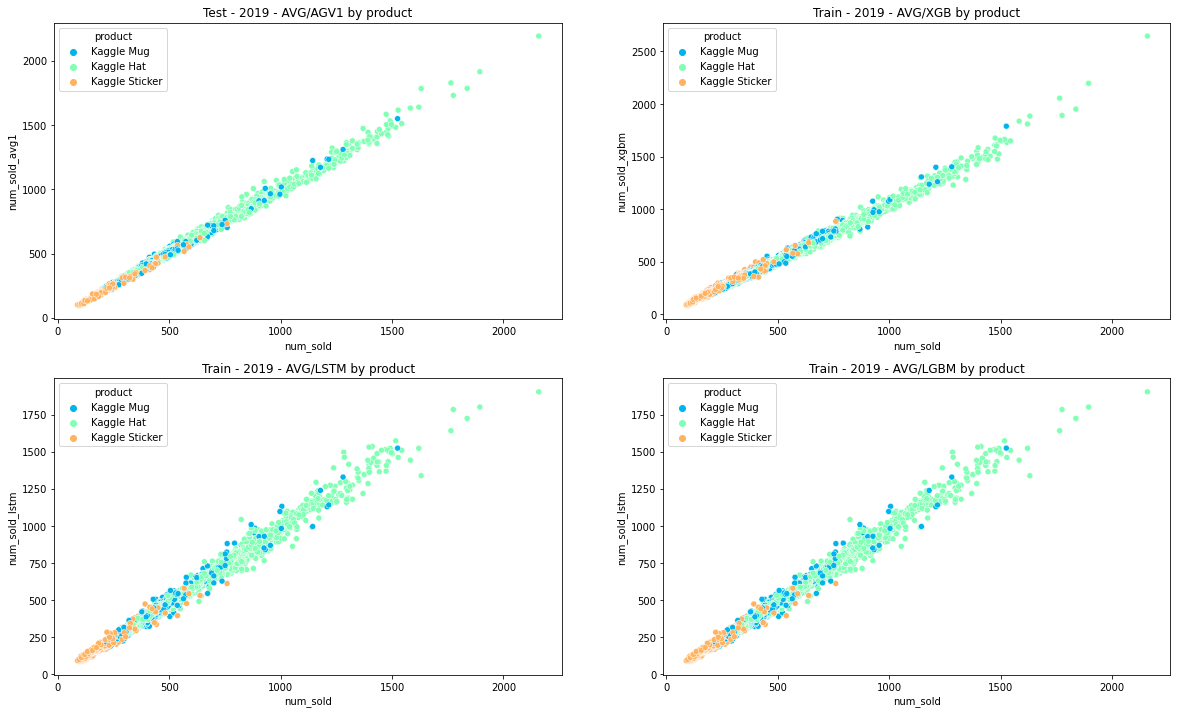

In [9]:
f, ax = plt.subplots(2, 2, figsize=(20, 12))

g1 = sns.scatterplot(x=test.num_sold, y=test.num_sold_avg1, palette="rainbow", data=test, hue='product', ax=ax[0,0])
g1.set_title("Test - 2019 - AVG/AGV1 by product")

g2 = sns.scatterplot(x=test.num_sold, y=test.num_sold_xgbm, palette="rainbow", data=test, hue='product', ax=ax[0,1])
g2.set_title("Train - 2019 - AVG/XGB by product")

g3 = sns.scatterplot(x=test.num_sold, y=test.num_sold_lstm, palette="rainbow", data=test, hue='product', ax=ax[1,0])
g3.set_title("Train - 2019 - AVG/LSTM by product")

g4 = sns.scatterplot(x=test.num_sold, y=test.num_sold_lstm, palette="rainbow", data=test, hue='product', ax=ax[1,1])
g4.set_title("Train - 2019 - AVG/LGBM by product")

plt.show()

In [10]:
## display error by month
errs_by_month = np.zeros((3, 12))

for month in test.month.unique():
    err1 = mean_squared_error(test[test.month == month].num_sold, test[test.month == month].num_sold_avg1)
    err2 = mean_squared_error(test[test.month == month].num_sold, test[test.month == month].num_sold_xgbm)
    err3 = mean_squared_error(test[test.month == month].num_sold, test[test.month == month].num_sold_lstm)
    print(f'Month {month}, AVG1 RMSE: {err1:.2f}, XGB RMSE: {err2:.2f}, LSTM RMSE: {err3:.2f}')    
    errs_by_month[0][month-1] = err1
    errs_by_month[1][month-1] = err2
    errs_by_month[2][month-1] = err3

Month 1, AVG1 RMSE: 272.17, XGB RMSE: 570.72, LSTM RMSE: 810.92
Month 2, AVG1 RMSE: 178.98, XGB RMSE: 556.87, LSTM RMSE: 472.41
Month 3, AVG1 RMSE: 236.42, XGB RMSE: 620.00, LSTM RMSE: 580.72
Month 4, AVG1 RMSE: 617.39, XGB RMSE: 1645.57, LSTM RMSE: 1770.13
Month 5, AVG1 RMSE: 329.09, XGB RMSE: 1078.94, LSTM RMSE: 816.20
Month 6, AVG1 RMSE: 213.97, XGB RMSE: 649.81, LSTM RMSE: 474.54
Month 7, AVG1 RMSE: 171.37, XGB RMSE: 281.73, LSTM RMSE: 203.22
Month 8, AVG1 RMSE: 150.42, XGB RMSE: 275.09, LSTM RMSE: 256.19
Month 9, AVG1 RMSE: 140.54, XGB RMSE: 345.21, LSTM RMSE: 191.80
Month 10, AVG1 RMSE: 130.93, XGB RMSE: 287.25, LSTM RMSE: 230.21
Month 11, AVG1 RMSE: 156.82, XGB RMSE: 316.29, LSTM RMSE: 288.26
Month 12, AVG1 RMSE: 425.14, XGB RMSE: 1969.34, LSTM RMSE: 1487.88


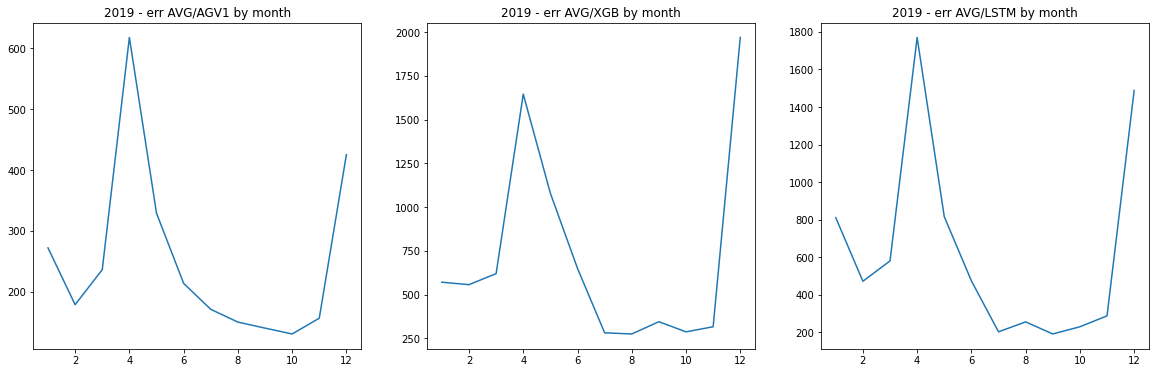

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

g1 = sns.lineplot(x=test.month.unique(), y=errs_by_month[0], palette="rainbow", ax=ax1)
g1.set_title("2019 - err AVG/AGV1 by month")

g2 = sns.lineplot(x=test.month.unique(), y=errs_by_month[1], palette="rainbow", ax=ax2)
g2.set_title("2019 - err AVG/XGB by month")

g3 = sns.lineplot(x=test.month.unique(), y=errs_by_month[2], palette="rainbow", ax=ax3)
g3.set_title("2019 - err AVG/LSTM by month")

plt.show()